In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *


4.1.21, 4.2.4, 5.1.21, 5.2

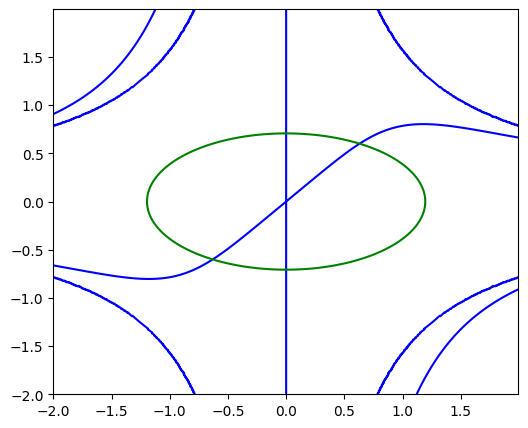

In [4]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

x, y = np.meshgrid(np.arange(-2, 2, 0.005), np.arange(-2, 2, 0.005))
plt.figure(figsize=(6, 5))
plt.contour(x, y, np.tan(x*y) - x**2, [0], colors=['blue'])
plt.contour(x, y, 0.7*x**2 + 2*y**2 - 1, [0], colors=['green'])
plt.show()

In [ ]:

def root(f, initial: np.array, eps: float = 1e-6) -> np.array:
    x = initial.astype(np.double)
    iter_cnt = 0
    f_cnt = len(f(initial))
    while np.linalg.norm(f(x)) > eps:
        x -= np.linalg.inv(jacobian(f, x, f_cnt)).dot(f(x))
        iter_cnt += 1
    return x, iter_cnt

In [2]:
x1, x2 = symbols('x1 x2')
f1 = tan(x1*x2) - x1*x1
f2 = 0.7*x1*x1 + 2*x2*x2 - 1

X = Matrix([x1, x2])
F = Matrix([f1, f2])
# F.subs([])
def newton_method(F, eps, initial):
    x_initial = np.array(initial)
    iteration_number = 0
    jacobian = F.jacobian(X)
    tmp = np.array(F.subs([(x1,x_initial[0]), (x2,x_initial[1])])).transpose()[0]
    print(np.linalg.norm(np.array(F.subs([(x1,x_initial[0]), (x2,x_initial[1])]))))
    while np.linalg.norm(np.array(F.subs([(x1,x_initial[0]), (x2,x_initial[1])]))[0]) > eps:
        iteration = (F.inv(jacobian))*F
        x_initial = x_initial - iteration.subs([(x1,x_initial[0]), (x2,x_initial[1])])
        iteration_number += 1
    return x_initial, iteration_number

newton_method(F, 0.1, [0.5, 0])

TypeError: loop of ufunc does not support argument 0 of type Float which has no callable sqrt method